# Korrelation von fehlenden Werten mit einzelnen Variablen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Um den Zusammenhängen von fehlenden Werten mit den Umständen der jeweiligen Länder und Regionen auf den Grund zu gehen wird eine Korrelations-Analyse durchgeführt. Hierzu werden Ländergruppen außer acht gelassen, da diese überporportional viele fehlende werte haben. Außerdem werden ausschließlich die Jahre 1990 bis 2020 betrachtet.

In [2]:
def reset_base():
    pd.set_option('display.float_format', lambda x: '%.4f' % x)
    
    #load dataset
    base= pd.read_csv('../Data/WDIData.csv') #see downloads worldbank
    base = base.drop(['Country Code', 'Indicator Code', 'Unnamed: 66'], axis=1) #name of column 'Unnamed: 66' may differ
    
    #drop groups of countries
    countries = pd.read_csv('additional_data/countries.csv').drop('Unnamed: 0', axis=1)
    base = pd.merge(base, countries, how='left')
    base = base.loc[base['Type'] != 'Region'].drop('Type', axis=1)
    
    #keep only years 1990-2020
    base = base.set_index(['Country Name', 'Indicator Name'])
    base = base.loc[:, '1990':'2020']

    return base

In [3]:
base= reset_base()
base.head(1)

,,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,Indicator Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Access to clean fuels and technologies for cooking (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.5000,23.0000,24.8000,26.7000,28.6000,30.3000,32.2000,34.1000,36.0000,NaN


Für jedes Land wird die Anzahl von fehlenden Werten über alle Jahre und Indikatoren hinweg gezählt.

In [4]:
base.isna().groupby('Country Name').sum().T.sum()

Country Name
Afghanistan              27434
Albania                  18556
Algeria                  20316
American Samoa           40907
Andorra                  39147
                         ...  
Virgin Islands (U.S.)    38106
West Bank and Gaza       24741
Yemen, Rep.              25317
Zambia                   20588
Zimbabwe                 21350
Length: 217, dtype: int64

In der folgenden Korrelations-Analyse wird die Anzahl von fehlenden Werten über den gesammten Betrachtungszeitraum mit verschieden Indikatoren, erhoben für das Jahr 2014 (dar dort die Datenlage besonders vollständig ist), korreliert.

In [5]:
#selecting data for 2014
#'Country Name' as index 'Indicator Name' as columns
year = 2014
df = base.reset_index()
df = df[['Country Name', 'Indicator Name', str(year)]]
df = df.set_index(['Country Name', 'Indicator Name']).unstack()
df.columns = df.columns.droplevel(0)

In [6]:
#adding number of total NaNs as extra column
df['NaNs'] = base.isna().groupby('Country Name').sum().T.sum()

In [7]:
#making correlation matrix and selecting column with the correlations with NaN ??????????
#sort by absolute values

results = pd.DataFrame(df.corr(min_periods=50, method='spearman')['NaNs']).dropna()
results['abs'] = results['NaNs'].abs()
results = results.sort_values('abs', ascending=False).drop('abs', axis=1)

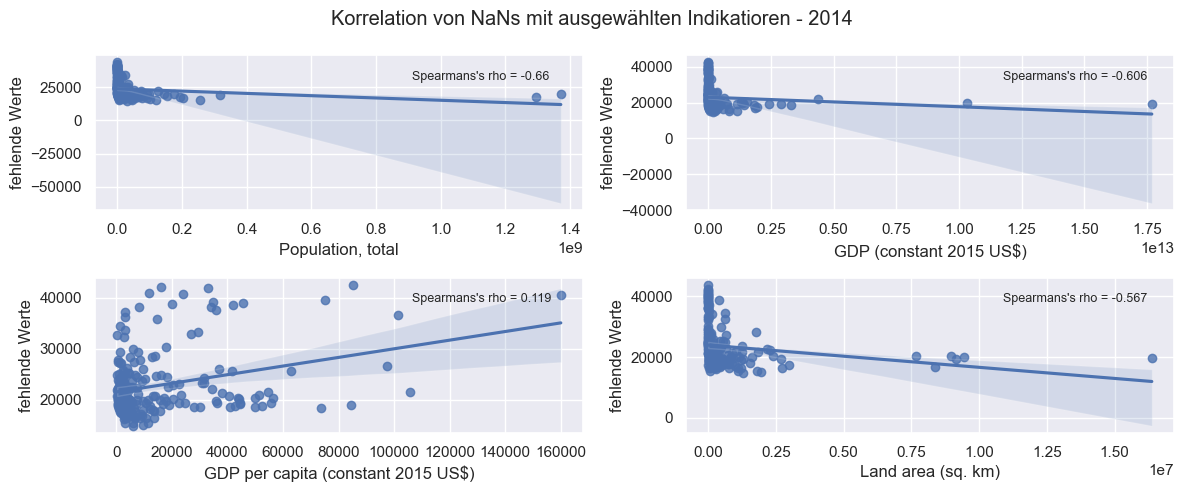

In [8]:
sns.set_theme(color_codes=True)
#sns.set_style('white')
#sns.set_context('paper', font_scale=2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12, 5), nrows=2, ncols=2)

x="Population, total"
sns.regplot(data=df, x=x, y='NaNs', ax=ax1)
ax1.set_xlabel(x)
ax1.set_ylabel('fehlende Werte')
#ax1.legend(markers, colors.keys(), numpoints=1)
ax1.text(0.65, 0.9, f"Spearmans's rho = {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax1.transAxes, fontsize=9)

x="GDP (constant 2015 US$)"
sns.regplot(data=df, x=x, y='NaNs', ax=ax2)
ax2.set_xlabel(x)
ax2.set_ylabel('fehlende Werte')
#ax1.legend(markers, colors.keys(), numpoints=1)
ax2.text(0.65, 0.9, f"Spearmans's rho = {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax2.transAxes, fontsize=9)

x="GDP per capita (constant 2015 US$)"
sns.regplot(data=df, x=x, y='NaNs', ax=ax3)
ax3.set_xlabel(x)
ax3.set_ylabel('fehlende Werte')
#ax3.legend(markers, colors.keys(), numpoints=1)
ax3.text(0.65, 0.9, f"Spearmans's rho = {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax3.transAxes, fontsize=9)

x="Land area (sq. km)"
sns.regplot(data=df, x=x, y='NaNs', ax=ax4)
ax4.set_xlabel(x)
ax4.set_ylabel('fehlende Werte')
#ax4.legend(markers, colors.keys(), numpoints=1)
ax4.text(0.65, 0.9, f"Spearmans's rho = {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax4.transAxes, fontsize=9)


plt.suptitle('Korrelation von NaNs mit ausgewählten Indikatioren - 2014')
plt.tight_layout()
#plt.savefig('figures/correlation_nans')


In [9]:
results.head(15)

,NaNs
Indicator Name,
NaNs,1.0000
Statistical performance indicators (SPI): Pillar 3 data products score (scale 0-100),-0.7683
Statistical Capacity Score (Overall Average) (scale 0 - 100),-0.7352
"Multilateral debt service (TDS, current US$)",-0.7286
"Debt service on external debt, total (TDS, current US$)",-0.7025
"External debt stocks, total (DOD, current US$)",-0.7017
"Secondary education, teachers, female",-0.6936
"External debt stocks, long-term (DOD, current US$)",-0.6930
"Secondary education, teachers",-0.6760


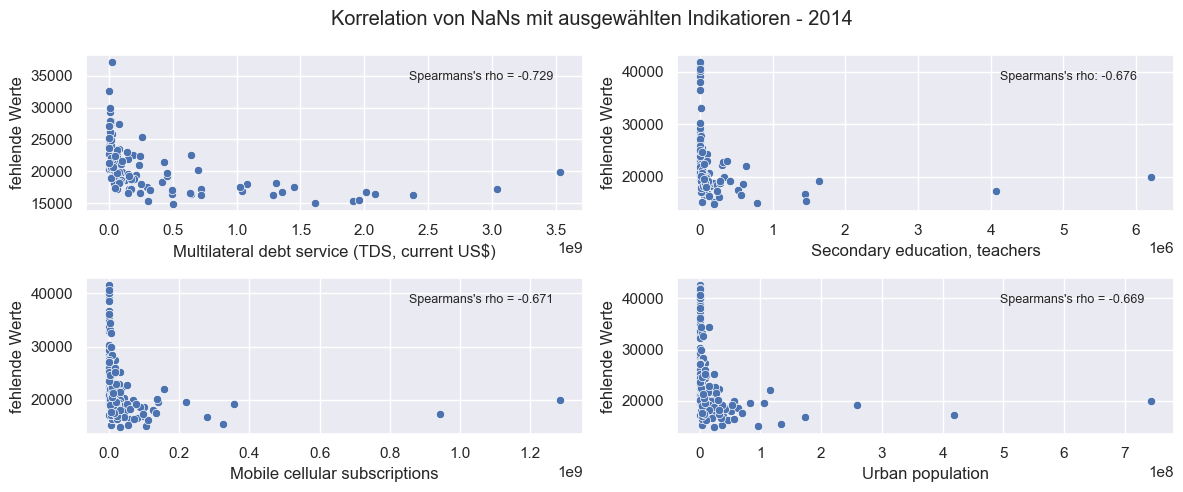

In [10]:
sns.set_theme(color_codes=True)
#sns.set_style('white')
#sns.set_context('paper', font_scale=2)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12, 5), nrows=2, ncols=2)

x='Multilateral debt service (TDS, current US$)'
sns.scatterplot(data=df, x=x, y='NaNs', ax=ax1)
ax1.set_xlabel(x)
ax1.set_ylabel('fehlende Werte')
#ax1.legend(markers, colors.keys(), numpoints=1)
ax1.text(0.65, 0.9,f"Spearmans's rho = {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax1.transAxes, fontsize=9)

x='Secondary education, teachers'
sns.scatterplot(data=df, x=x, y='NaNs', ax=ax2)
ax2.set_xlabel(x)
ax2.set_ylabel('fehlende Werte')
#ax1.legend(markers, colors.keys(), numpoints=1)
ax2.text(0.65, 0.9,f"Spearmans's rho: {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax2.transAxes, fontsize=9)

x='Mobile cellular subscriptions'
sns.scatterplot(data=df, x=x, y='NaNs', ax=ax3)
ax3.set_xlabel(x)
ax3.set_ylabel('fehlende Werte')
#ax3.legend(markers, colors.keys(), numpoints=1)
ax3.text(0.65, 0.9, f"Spearmans's rho = {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax3.transAxes, fontsize=9)

x='Urban population'
sns.scatterplot(data=df, x=x, y='NaNs', ax=ax4)
ax4.set_xlabel(x)
ax4.set_ylabel('fehlende Werte')
#ax4.legend(markers, colors.keys(), numpoints=1)
ax4.text(0.65, 0.9, f"Spearmans's rho = {round(results.loc[x, 'NaNs'], 3)}", ha="left", va="top", transform=ax4.transAxes, fontsize=9)


plt.suptitle('Korrelation von NaNs mit ausgewählten Indikatioren - 2014')
plt.tight_layout()
plt.savefig('figures/correlation_nans')